## Factorial

In [4]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

factorial(10)

3628800

In [5]:
import math 

math.factorial(10)

3628800

## Permutation

In [6]:
def permutation(n,k):
    permut = factorial(n)/factorial(n-k)
    return permut

## Combination

In [8]:
def combination(n,k):
    combin = factorial(n)/(factorial(n-k)*factorial(k))
    return combin

## Probability Mass Function

In [9]:
size_and_count = {17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4}

In [10]:
#Number of classes 
sum_class = sum(size_and_count.values())

#PMF = Each Class/Total
pmf = [round(value/sum_class, 3) for value in size_and_count.values()]    

#Sizes = Size for each class 
sizes = list(size_and_count.keys())

sizes, pmf

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054])

In [11]:
#Check that sum = 1

import numpy as np 
np.array(pmf).sum()

1.0

In [12]:
#Expected Values

EV = np.multiply(sizes, pmf).sum()
EV

32.49

## Bias in PMF

In [14]:
biased = np.multiply(sizes, pmf)

biased_sum = biased.sum()

biased, biased_sum

(array([2.295, 2.97 , 6.561, 2.592, 3.996, 5.67 , 3.196, 2.132, 3.078]), 32.49)

In [15]:
pmf2 = []
for b in biased:
    pmf2.append(round(b/biased_sum, 3))
    
sizes, pmf2

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

In [16]:
EV_bias = np.multiply(sizes, pmf2).sum()
EV_bias

36.577

In [17]:
import matplotlib.pyplot as plt

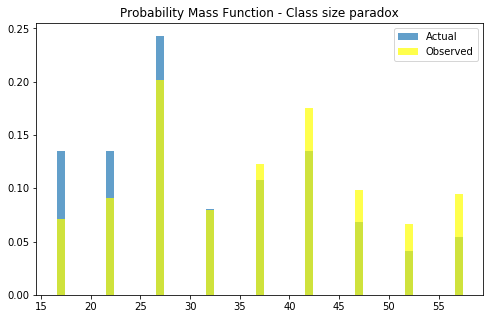

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(size_and_count.keys(), pmf, label= 'Actual', alpha = 0.7 );
plt.bar(size_and_count.keys(), pmf2, color= "yellow", alpha = 0.7, label= 'Observed');
plt.title ("Probability Mass Function - Class size paradox");
plt.legend()
plt.show()

## Cumulative Density Function

In [20]:
def calculate_cdf(lst, X):
    count = 0
    for value in lst:
        if value <= X:
            count += 1

    cum_prob = count / len(lst) 
    return round(cum_prob, 3)

test_lst = [1,2,3]
test_X = 2

calculate_cdf(test_lst, test_X)

0.667

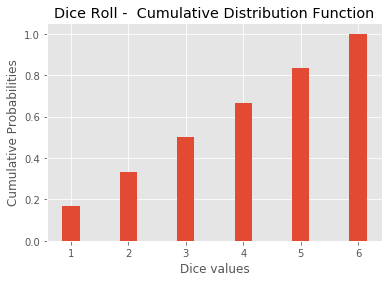

In [22]:
dice_lst = [1,2,3,4,5,6]
dice_cum = [0.167, 0.333, 0.5, 0.667, 0.833, 1.0]

plt.style.use('ggplot')

plt.bar(dice_lst, dice_cum, width=0.3);
plt.title ("Dice Roll -  Cumulative Distribution Function");
plt.xlabel('Dice values')
plt.ylabel('Cumulative Probabilities');

## Binomial Distribution

In [23]:
def binom_distr(n,p,k):
    p_k = (factorial(n)/(factorial(k)*factorial(n-k)))*(p**k*(1-p)**(n-k))
    return p_k

In [24]:
binom_distr(10,0.25,3)

0.25028228759765625

## Normal Distribution

In [26]:
## Create a random normal distribution

mu, sigma = 20, 3
n = 5000
s = np.random.normal(mu, sigma, n)

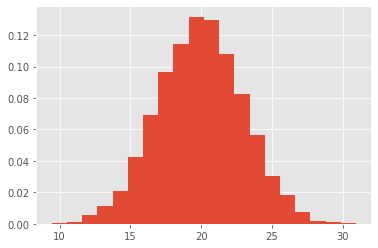

In [27]:
count, bins, ignored = plt.hist(s, 20, density=True)

In [28]:
#Calculate density 

density = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

/Users/mihirbhagat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


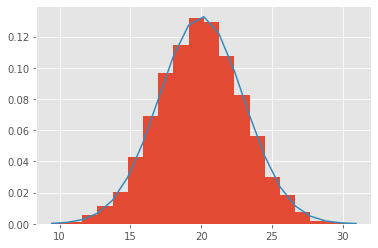

In [29]:
plt.hist(s, 20, normed=True)
plt.plot(bins, density)
plt.show()

## Z Score

In [30]:
#Z score is the number of standard deviations away from the mean

value = 30
mean = 20
sd = 10

Z = (value - mean)/sd
Z

1.0

In [31]:
import scipy.stats as stats

# Probabilities up to z-score of 1.5
print(stats.norm.cdf(1.5))

# Probabilities greater than z-score of 1.34
print (1-stats.norm.cdf(1.34))

0.9331927987311419
0.09012267246445238


## One Sample Z Test

In [32]:
## Comparing a sample to the population. Same or different? 

In [34]:
# Z-Statistic

import scipy.stats as stats
from math import sqrt
x_bar = 103 # sample mean 
n = 40 # number of students
sigma = 16 # sd of population
mu = 100 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

1.1858541225631423

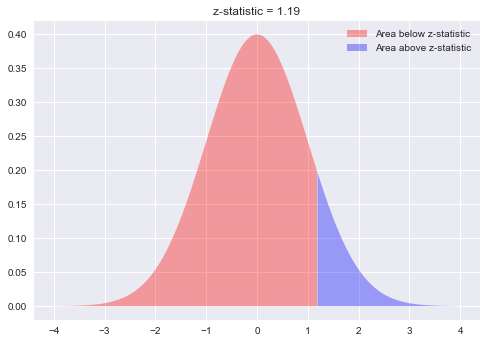

In [35]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.19,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.19,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.19,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.19,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 1.19');

## P Value

In [33]:
# If p-value is below significance level, then reject the null hypothesis

In [37]:
pval = 1 - stats.norm.cdf(z)
pval

0.11783995671451875

## Skew

In [40]:
# Positive Skew = Mean > Median, right tail
# Left Skew = Median > Mean, left tail 

Skewness = 0.014702984780092349


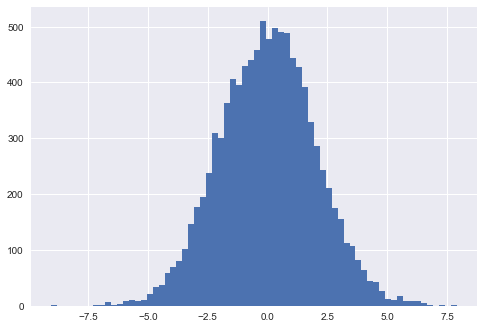

In [39]:
from scipy.stats import kurtosis, skew

x_random = np.random.normal(0, 2, 10000)
plt.hist(x_random, bins='auto')
print ('Skewness =', skew(x_random))

## Kurtosis

In [42]:
## The length of the tail

print ('kurtosis =', kurtosis(x_random))

kurtosis = 0.10459867004383128
